In [61]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# Media

# **Media (Promedio)**

La **media aritmética** de un conjunto de datos es una medida de tendencia central que representa el valor promedio de los datos. Se calcula sumando todos los valores y dividiendo por la cantidad total de elementos.

## **Fórmula de la Media**
Si tenemos un conjunto de $ n $ valores $ x_1, x_2, \dots, x_n $, la media se define como:


\begin{equation}
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
\end{equation}


Donde:
- $ \mu $ es la media.
- $ x_i $ son los valores del conjunto de datos.
- $ n $ es el número total de valores.

Para una ecuación más corta, usamos la notación en línea:  
$$ \mu = \frac{1}{n} \sum x_i $$

## **Cálculo en Python con la libreria datascience**
Podemos calcular la media de una lista de valores usando Python:

```python
import datascience

# Datos de ejemplo
datos = make_array(10, 20, 30, 40, 50)

# Calcular la media
media = np.mean(datos)

print(f"La media es: {media}")


In [62]:
values = make_array(2, 3, 3, 9)
values.mean()

4.25

In [63]:
values = make_array(1, 0, 0, 1,0,1)

In [64]:
values.mean()

0.5

In [65]:
values.sum()

3

La media no es el punto medio de los datos


In [66]:
make_array(2, 3, 3, 9)

array([2, 3, 3, 9])

\begin{equation}
\frac{2+3+3+9}{4}
\end{equation}

In [67]:
values1 = make_array(2, 3, 3, 9)
values2 = make_array(2, 2, 3, 3, 3 ,3, 9, 9)
values3 = make_array(2, 2, 2,3, 3, 3 ,3,3,3 ,9, 9,9)

In [70]:
print("Media 1", np.mean(values1))
print("Media 2",np.mean(values2))
print("Media 3",np.mean(values3))

Media 1 4.25
Media 2 4.25
Media 3 4.25


En el anterior caso en cada uno de los arreglos  se mantiene la proporción de números diferentes, y la media toma el mismo valor, es decir, cuando la proporción de números es la misma en diferentes arreglos, la media toma el mismo valor, es independiente de la cantidad de números

Text(0, 0.5, '% por unidad')

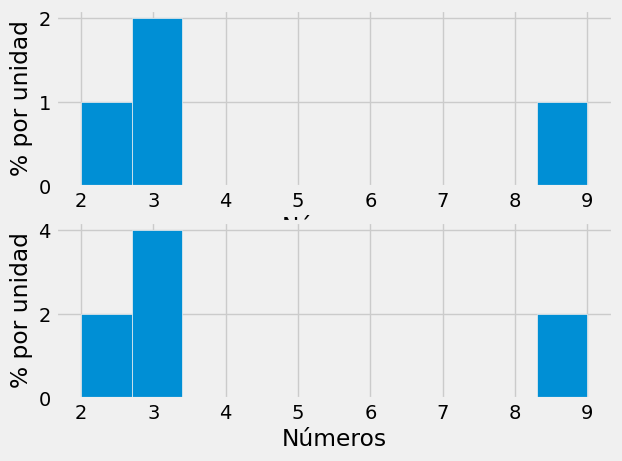

In [71]:
plots.subplot(211)
plots.hist(values1)
plots.xlabel("Números")
plots.ylabel("% por unidad")
plots.subplot(212)
plots.hist(values2)
plots.xlabel("Números")
plots.ylabel("% por unidad")


Debido a que la media es un punto de equilibrio, se puede entender como el centro de gravedad del conjunto de datos,  a veces se muestra como un  triángulo en la base del histograma.

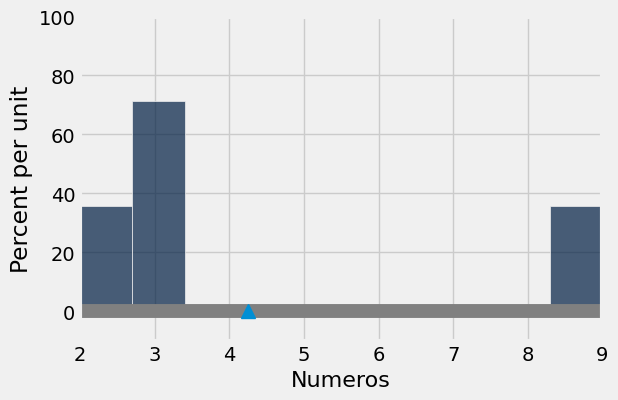

In [73]:
dt = Table().with_column("Numeros", values1)
dt.hist()

plots.ylim(-0.1,1)
plots.xlim(2,9)
plots.axhline(0,color="gray",lw=10,)
plots.plot(dt["Numeros"].mean(),0, "^", ms=10)


# **Mediana: Punto de Equilibrio sobre los Datos**

La **mediana**  es el valor que divide la distribución en dos partes **iguales**, de modo que el **50% de los datos están por debajo** y el **50% están por encima**.

## **Cálculo de la Mediana**
Dado un conjunto de $ n $ valores $ x_1, x_2, \dots, x_n $ ordenados de menor a mayor:

- **Si $ n $ es impar**, la mediana es el valor central:
  
  \begin{equation}
  \tilde{x} = x_{\frac{n+1}{2}}
  \end{equation}
  

- **Si $ n $ es par**, la mediana es el promedio de los dos valores centrales:
  
  \begin{equation}
  \tilde{x} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2}
  \end{equation}
  

## **Cálculo en Python**
Podemos calcular la mediana de un conjunto de datos usando `numpy`:

```python
import numpy as np

# Datos de ejemplo
y = make_array(10, 20, 30, 40, 50)

# Calcular la mediana
mediana = percentile(50, y)

print(f"La mediana es: {mediana}")


# La media y la mediana

La media o promedio,  es el punto de equilibrio de un  histograma, y la mediana,  es el "punto medio" de los datos.

Cuando la distribucion de datos es simetrica, la media y la mediana toman el mismo valor.


In [75]:
no_symmetric1 = make_array(2, 3, 3, 9)
print(np.mean(no_symmetric1))
print(percentile(50,no_symmetric1))

4.25
3


In [76]:
no_symmetric2 = make_array(2, 2, 2,3, 3, 3 ,3,3,3 ,9, 9,9)
print(np.mean(no_symmetric2))
print(percentile(50,no_symmetric2))

4.25
3


In [77]:
symmetric1 = make_array(2, 3, 3, 4)

In [78]:
print(np.mean(symmetric1))
print(percentile(50,symmetric1))

3.0
3



Si la puntuación de un estudiante en un examen está por debajo de la media, ¿eso implica que el estudiante está en la mitad inferior de la clase en esa prueba?

In [79]:
symmetric1 = make_array(2, 3, 3, 4)
tb = Table().with_columns("S",symmetric1 ,"NS", no_symmetric1 )

(-0.1, 0.5)

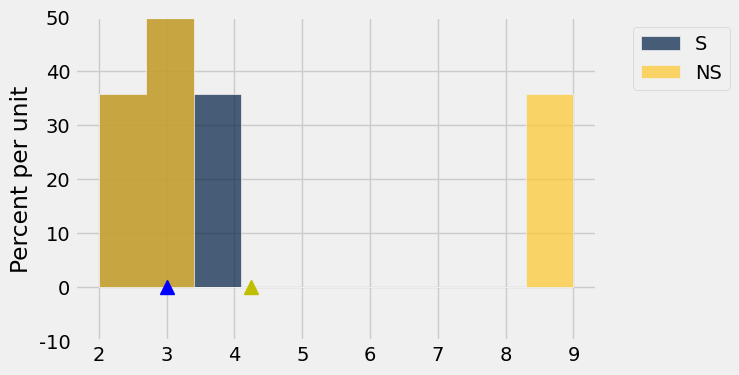

In [80]:
tb.hist()
plots.plot(tb["S"].mean(),0, "^b", ms=10)
plots.plot(tb["NS"].mean(),0, "^y", ms=10)
plots.ylim(-0.1,0.5)

In [81]:
print(percentile(50,symmetric1))
print(percentile(50,no_symmetric1))

3
3


# Ejemplo 


In [82]:
path_data=""
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv').where('Salaries', are.above(10000))
sf_2015 = sf2015.where('Salaries', are.above(10000))
compensation = sf2015.column('Total Compensation')
mediana = percentile(50, compensation)
media = np.mean(compensation)

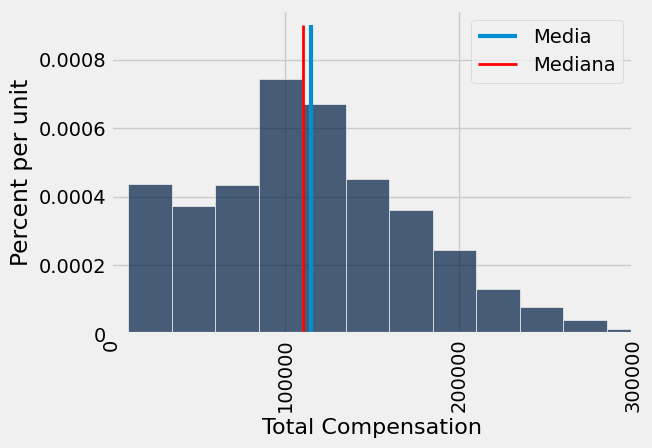

In [83]:
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))
plots.vlines(media,ymin=0, ymax=0.000009, lw=3.0,label="Media")
plots.vlines(mediana,ymin=0, ymax=0.000009,color="r",lw=2.0,label="Mediana")
plots.xlim(0, 300000)
plots.legend()

Las distribuciones de ingresos de grandes poblaciones tienden a estar sesgadas. Cuando la mayor parte de una población tiene ingresos medios a bajos, pero una proporción muy pequeña tiene ingresos muy altos, el histograma tiene una cola larga y delgada a la derecha.

# El tamaño aproximado de las desviaciones del promedio

El objetivo es medir aproximadamente qué tan lejos están los números de su promedio. Para hacer esto, primero necesitamos el promedio



In [116]:
any_numbers = make_array(1, 2, 2, 10)
mean = np.mean(any_numbers)
deviations = any_numbers - mean


In [117]:
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


In [118]:
mean

3.75

In [119]:
sum(deviations)

0.0

In [120]:
np.mean(deviations)

0.0

Debido a esto, la media de las desviaciones no es una medida útil del tamaño de las desviaciones.

In [121]:
squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [122]:
variance = np.mean(squared_deviations)
variance

13.1875

Varianza: La desviación media al cuadrado calculada anteriormente se llama varianza de los valores.



In [123]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1
sd = variance ** 0.5
sd

3.6314597615834874

# Pasos para determinar la desviaciones del promedio

1. Calcular el promedio 
2. Computar las desviaciones de los datos respecto al  promedio
3. Calcular las desviaciones cuadradas
4. Calcular la varianza
5. Calcular la raiz cuadrada

- En python solo basta con 
```python
x=make_array(...)
np.std(x)
```

# Desviación estándar

Definición. El SD de una lista se define como el cuadrado medio de raíz de las desviaciones del promedio.

In [124]:
np.std(any_numbers)

3.6314597615834874

In [125]:
path = "nba2013.csv"

In [126]:
nba13 = Table.read_table(path)

In [127]:
nba13["Height"]= nba13.apply(lambda x: x*0.0254,"Height")

In [128]:
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,2.032,221,23
Darius Miller,Guard,2.032,235,23
Trevor Ariza,Guard,2.032,210,28
James Jones,Guard,2.032,215,32
Wesley Johnson,Guard,2.0066,215,26
Klay Thompson,Guard,2.0066,205,23
Thabo Sefolosha,Guard,2.0066,215,29
Chase Budinger,Guard,2.0066,218,25
Kevin Martin,Guard,2.0066,185,30
Evan Fournier,Guard,2.0066,206,20


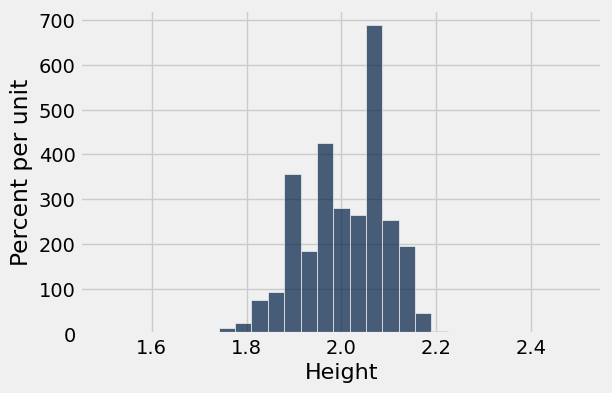

In [129]:
nba13.select('Height').hist(bins=np.linspace(1.5, 2.50, 30))

In [130]:
mean_height = np.mean(nba13.column('Height'))
mean_height

2.0082598019801976

¿A que altura estan los jugadores del promedio?

In [131]:
sd_height = np.std(nba13.column('Height'))
sd_height

0.087645168448899871

In [132]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,2.2098,263,26
Roy Hibbert,Center,2.1844,278,26
Alex Len,Center,2.159,255,20


In [133]:
2.2098 - mean_height

0.20154019801980239

In [134]:
(2.2098 - mean_height)/sd_height

2.299501519439799

En otras palabras, la altura del jugador más alto estaba a unos 2,3 SD por encima de la media.

Jugador mas bajo

In [135]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,1.7526,185,24
Nate Robinson,Guard,1.7526,180,29
John Lucas III,Guard,1.8034,157,30


In [136]:
(1.75526 - mean_height)/sd_height

-2.8866371810067899

# Primera razón principal para medir  la SD

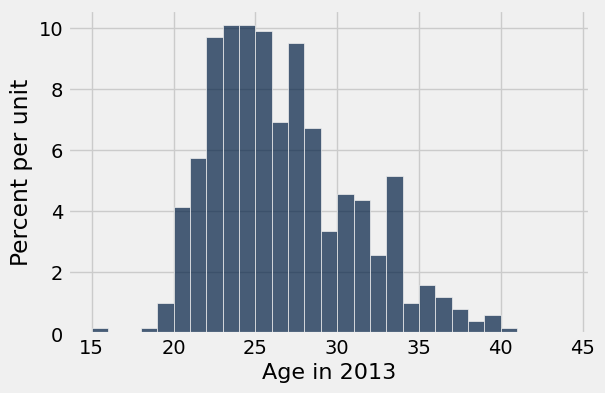

In [137]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [138]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.3212004417203067)

In [139]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,2.0574,250,40
Steve Nash,Guard,1.905,178,39
Derek Fisher,Guard,1.8542,210,39


In [140]:
(40 - mean_age)/sd_age

3.1958482778922357

# **Límite de Chebychev (Desigualdad de Chebychev)**

El **Límite de Chebychev** o **Desigualdad de Chebychev** es un resultado estadístico que nos dice qué proporción de los datos en cualquier distribución (sin importar su forma) caerá dentro de un cierto número de desviaciones estándar de la media.

## **Fórmula de la Desigualdad de Chebychev**
Para cualquier conjunto de datos con media $\mu$ y desviación estándar $\sigma$, la proporción de valores que están dentro de $k$ desviaciones estándar de la media $\mu \pm k\sigma$ es al menos:

\begin{equation}
1 - \frac{1}{k^2}
\end{equation}

para cualquier \( k > 1 \).

## **Interpretación**
Esto significa que, independientemente de la forma de la distribución (ya sea simétrica, sesgada o con colas largas), podemos hacer las siguientes afirmaciones:

- **Al menos el 75%** de los datos están dentro de **2 desviaciones estándar** de la media $(\mu \pm 2\sigma)$.
  
\begin{equation}
1 - \frac{1}{2^2} = 1 - \frac{1}{4} = 0.75 \text{ (o 75\%)}
\end{equation}

- **Al menos el 89%** de los datos están dentro de **3 desviaciones estándar** de la media $(\mu \pm 3\sigma$.

\begin{equation}
1 - \frac{1}{3^2} = 1 - \frac{1}{9} = 0.89 \text{ (o 89\%)}
\end{equation}

- **Al menos el 93.75%** de los datos están dentro de **4 desviaciones estándar** de la media $\mu \pm 4\sigma$.

\begin{equation}
1 - \frac{1}{4^2} = 1 - \frac{1}{16} = 0.9375 \text{ (o 93.75\%)}
\end{equation}

## **Ejemplo**
Supongamos que los ingresos en una ciudad tienen una media de **40,000** y una desviación estándar de **10,000**. Si usamos la desigualdad de Chebychev:

- Al menos el **75%** de las personas tienen ingresos entre **20,000 y 60,000** $(\mu \pm 2\sigma )$.
- Al menos el **89%** tienen ingresos entre **10,000 y 70,000** $(\mu \pm 3\sigma)$.

Esto es útil cuando no sabemos si los datos siguen una distribución normal, ya que nos da una forma de estimar cuántos datos estarán dentro de ciertos rangos.


# Unidades estandar

\begin{equation}
z=\frac{\mathrm{value}-\mathrm{average}}{SD}
\end{equation}

In [141]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

# Ejemplo 

In [142]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [143]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979




la proporción de estos valores extremos es pequeña, y los límites de Chebychev siguen siendo ciertos. Por ejemplo, calculemos el porcentaje de tiempos de retraso que están en el rango "promedio
±
3 SD". Esto es el mismo que el porcentaje de veces para las que las unidades estándar están en el rango (-3, 3). Eso es alrededor del 98 %, como se calcula a continuación, consistente con el límite de Chebychev de "al menos el 89 %

In [144]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

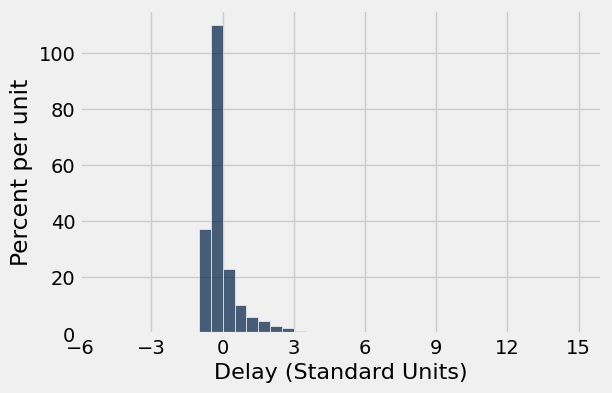

In [145]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

# La desviacion estandar y la curva normal

Sabemos que la media es el punto de equilibrio del histograma. A diferencia de la media, la SD generalmente no es fácil de identificar mirando el histograma.

In [146]:
baby = Table.read_table('baby.csv')
baby["Maternal Height"] = baby.apply(lambda x:x*0.0254,"Maternal Height")

In [147]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

1.6000000000000001

In [148]:
sd_height = np.round(np.std(heights), 1)
sd_height

0.10000000000000001

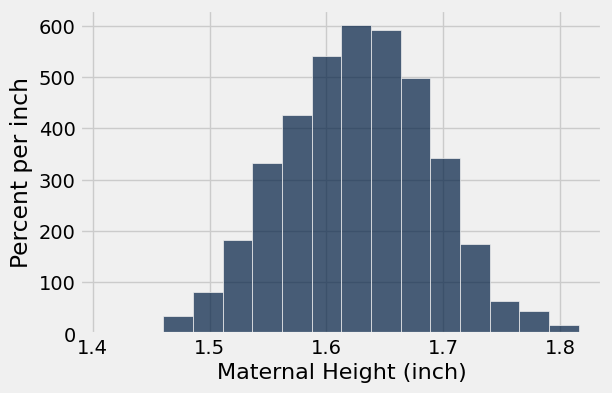

In [149]:
baby.hist('Maternal Height', bins=0.0254*np.arange(55.5, 72.5, 1), unit='inch')
#positions = 0.0254*np.arange(-3, 3.1, 1)*sd_height + mean_height
#plots.xticks(positions);

# La curva normal estandar

# **Características de una Función Normal**

Una **distribución normal** (o distribución de Gauss) es una función de densidad de probabilidad que sigue la forma de una **campana simétrica** y está definida por dos parámetros:

- **Media (\(\mu\))**: Representa el centro de la distribución.
- **Desviación estándar (\(\sigma\))**: Controla el ancho de la curva, es decir, qué tan dispersos están los datos alrededor de la media.

## **Ecuación de la Distribución Normal**
La función de densidad de probabilidad (PDF) de una distribución normal está dada por la ecuación:

\begin{equation}
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

donde:
- $ x $ es el valor de la variable aleatoria.
- $ \mu $ es la media de la distribución.
- $ \sigma $ es la desviación estándar.
- $ e $ es la base de los logaritmos naturales $\approx 2.718$
- $ \pi $ es la constante matemática $\approx 3.1416$

## **Propiedades de la Distribución Normal**
1. **Simetría**: La curva es simétrica respecto a la media $\mu$.
2. **Campana**: La forma de la curva sigue una campana con colas que se extienden indefinidamente sin tocar el eje \(x\).
3. **Área total bajo la curva**: Siempre es **1** (100% de probabilidad).
4. **Regla Empírica (68-95-99.7)**:
   - **68%** de los valores están dentro de **1 desviación estándar** $\mu \pm \sigma$
   - **95%** de los valores están dentro de **2 desviaciones estándar** $\mu \pm 2\sigma$
   - **99.7%** de los valores están dentro de **3 desviaciones estándar** $\mu \pm 3\sigma$

## **Ejemplo en Python**
El siguiente código genera la gráfica de una **distribución normal** y resalta el área bajo la curva para un rango específico utilizando la función de distribución acumulativa (**CDF**).


función de distribución acumulativa

In [150]:
from scipy import stats
stats.norm

In [151]:
from scipy import stats
stats.norm.cdf(1)

0.84134474606854293

In [152]:
1- stats.norm.cdf(1)

0.15865525393145707

In [153]:
# Parámetros de la distribución normal
mu = 0      # Media
sigma = 1   # Desviación estándar

# Rango de valores para X
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Función de densidad de probabilidad (PDF)
pdf = norm.pdf(x, mu, sigma)
plots.plot(x, pdf, 'b', linewidth=2, label="Distribución Normal")

NameError: name 'norm' is not defined

In [154]:
# Crear la gráfica
plots.figure(figsize=(10, 6))
plots.plot(x, pdf, 'b', linewidth=2, label="Distribución Normal")

# Rango para sombrear (por ejemplo, entre -1 y 1)
x_fill = np.linspace(-4*sigma, 1, 100)
x_fill2 = np.linspace(1, 4*sigma, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
y_fill2 = norm.pdf(x_fill2, mu, sigma)

plots.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label="Área bajo la curva (CDF)")
plots.fill_between(x_fill2, y_fill2, color='yellow', alpha=0.3, label="Área bajo la curva (CDF)")


# Etiquetas y título
plots.xlabel("X")
plots.ylabel("Densidad de Probabilidad")
plots.title(f"Distribución Normal y su Área Bajo la Curva {stats.norm.cdf(1)}")
plots.legend()
plots.grid(True)

# Mostrar la gráfica
plots.show()


NameError: name 'pdf' is not defined

<Figure size 1000x600 with 0 Axes>

# **Problema: Análisis de Calificaciones de Estudiantes**

Un profesor analiza las calificaciones de sus estudiantes en un examen y descubre que siguen una **distribución normal** con:  
- **Media $\mu$ = 70 puntos**  
- **Desviación estándar $\sigma$ = 10 puntos**  

El profesor quiere visualizar cuántos estudiantes caen dentro de **1, 2 y 3 desviaciones estándar** de la media. Basándose en la teoría de la distribución normal:  

- **Entre $ \mu \pm 1\sigma $ (60-80 puntos)** → Aproximadamente **68%** de los estudiantes.  
- **Entre $ \mu \pm 2\sigma $ (50-90 puntos)** → Aproximadamente **95%** de los estudiantes.  
- **Entre $ \mu \pm 3\sigma $ (40-100 puntos)** → Aproximadamente **99.73%** de los estudiantes.  

Según la **Desigualdad de Chebychev**:  
- Al menos el **75%** de los datos están en $ \mu \pm 2\sigma $.  
- Al menos el **88.89%** de los datos están en $ \mu \pm 3\sigma $.  

Realozar un programa en python que permita realizar el  grafico de la **distribución normal** de las calificaciones y sombrear las regiones correspondientes a **1, 2 y 3 desviaciones estándar**.





In [155]:
mu=70
sigma=10
x = np.linspace(mu-4*sigma, mu+4*sigma,1000)
pdf = norm.pdf(x, mu, sigma)
plots.plot(x, pdf)
plots.xlabel("x")
plots.ylabel("f(x)")

NameError: name 'norm' is not defined

In [156]:
plots.plot(x, pdf)
k = 1
x_fill = np.linspace(mu- k*sigma, mu+ k*sigma, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plots.fill_between(x_fill, y_fill, color=color, alpha=0.3, label=label)
plots.xlabel("x")
plots.ylabel("f(x)")

NameError: name 'pdf' is not defined

In [157]:
stats.norm.cdf(1)

0.84134474606854293

In [158]:
p_izquierda = norm.cdf(mu - 1*sigma, mu, sigma)  
p_derecha = norm.cdf(mu + 1*sigma, mu, sigma)  
Area=p_derecha-p_izquierda

NameError: name 'norm' is not defined

In [159]:
Area*100

NameError: name 'Area' is not defined